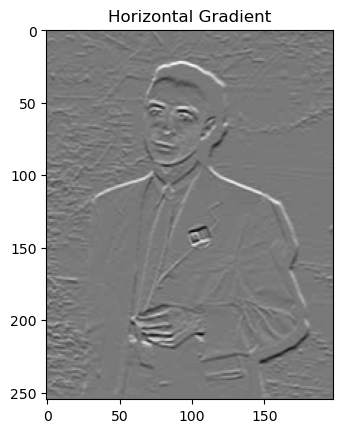

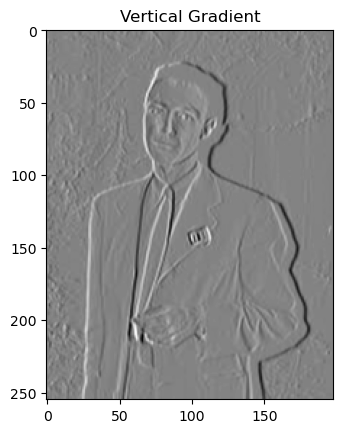

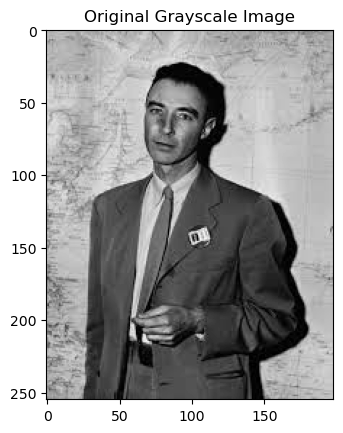

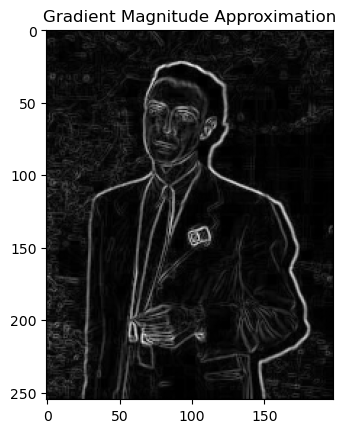

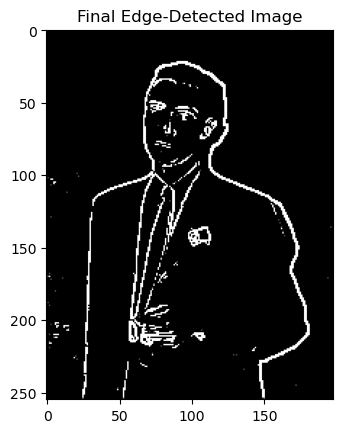

In [22]:
import cv2
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
IMG_PATH = './images/'
IMG_NAME = 'oppenheimer_1.png'
# Load the image in grayscale
b = cv2.imread(IMG_PATH + IMG_NAME, cv2.IMREAD_GRAYSCALE)

# No need to convert to grayscale again
obama =b

# Define Sobel filters
sobel_horizontal = np.array([[1, 2, 1],
                             [0, 0, 0],
                             [-1, -2, -1]], dtype=np.float32)

sobel_vertical = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]], dtype=np.float32)

# Apply Sobel filters to get horizontal and vertical gradients
obama_horizontal = cv2.filter2D(obama.astype(np.float32), -1, sobel_horizontal)
obama_vertical = cv2.filter2D(obama.astype(np.float32), -1, sobel_vertical)

# Display horizontal and vertical gradients
plt.imshow(obama_horizontal, cmap='gray')
plt.title('Horizontal Gradient')
plt.show()

plt.imshow(obama_vertical, cmap='gray')
plt.title('Vertical Gradient')
plt.show()

# Compute gradient magnitude approximation
obama_approximation = np.abs(obama_horizontal) + np.abs(obama_vertical)

# Assign approximation to grad_mag_test
grad_mag_test = obama_approximation.copy()

# Display original and gradient images
plt.imshow(obama, cmap='gray')
plt.title('Original Grayscale Image')
plt.show()

plt.imshow(grad_mag_test, cmap='gray')
plt.title('Gradient Magnitude Approximation')
plt.show()

# Set thresholds
strong_threshold = 0.6
weak_threshold = 0.3

# Calculate threshold values
strong_threshold_value = strong_threshold * np.max(grad_mag_test)
weak_threshold_value = weak_threshold * np.max(grad_mag_test)

# Apply thresholding
grad_mag_test[grad_mag_test < weak_threshold_value] = 0
grad_mag_test[grad_mag_test >= strong_threshold_value] = np.max(grad_mag_test)

# Find in-between values
inbetween_values = np.logical_and(grad_mag_test >= weak_threshold_value, grad_mag_test < strong_threshold_value)
inbetween_values = inbetween_values * grad_mag_test

# Get image dimensions
rows, cols = inbetween_values.shape

# Perform edge tracking by hysteresis
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        if inbetween_values[i, j] == 0:
            continue
        else:
            if (grad_mag_test[i, j + 1] >= inbetween_values[i, j] or
                grad_mag_test[i, j - 1] >= inbetween_values[i, j] or
                grad_mag_test[i + 1, j] >= inbetween_values[i, j] or
                grad_mag_test[i - 1, j] >= inbetween_values[i, j] or
                grad_mag_test[i + 1, j + 1] >= inbetween_values[i, j] or
                grad_mag_test[i + 1, j - 1] >= inbetween_values[i, j] or
                grad_mag_test[i - 1, j + 1] >= inbetween_values[i, j] or
                grad_mag_test[i - 1, j - 1] >= inbetween_values[i, j]):
                grad_mag_test[i, j] = np.max(grad_mag_test)
            else:
                inbetween_values[i, j] = 0

# Display the final edge-detected image
plt.imshow(grad_mag_test, cmap='gray')
plt.title('Final Edge-Detected Image')
plt.show()


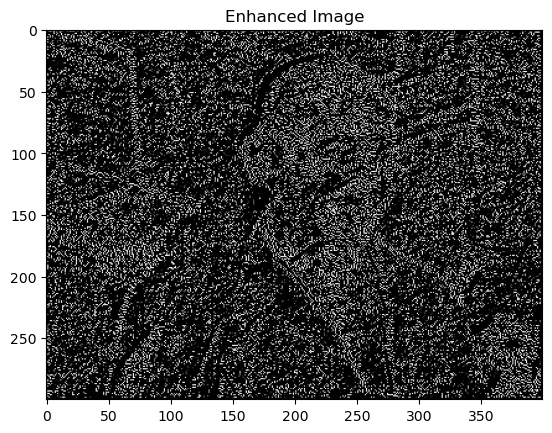

In [64]:

grad_magnitudes = np.sqrt(edges_vertical **2 + edges_horizontal**2);
grad_magnitudes[0,:]=0;
grad_magnitudes[-1,:]=0;
grad_magnitudes[:,0]=0;
grad_magnitudes[:,-1]=0;
grad_magnitudes_final = np.copy(grad_magnitudes);
grad_direction = np.arctan2(edges_vertical,edges_horizontal,)* 180 / np.pi;
grad_direction = np.mod(grad_direction + 360, 360)

for i in range(0, len(grad_direction+1)):
    for j in range(0, len(grad_direction [0]+1)):
       
        for k in range(1, 9):  # Adjust 100 here if it represents the range up to some other value
            if grad_direction[i, j] <= 22.5 + 45 * (k - 1):
                grad_direction[i, j ] = 45 * (k - 1)
                break
        else:
            grad_direction[i, j] = 0  # This executes only if the loop wasn't broken


for i in range(1, len(grad_direction)- 1):
    for j in range(1, len(grad_direction[0]) - 1):


        if grad_direction[i, j] == 0:
            if grad_magnitudes[i, j] > grad_magnitudes[i, j - 1] and grad_magnitudes[i, j] > grad_magnitudes[i, j + 1]:
                grad_magnitudes_final[i, j] = grad_magnitudes[i, j]
            else:
                grad_magnitudes_final[i, j] = 0
        
        elif grad_direction[i, j] == 45:
            # Diagonal (bottom-left to top-right) check
            if grad_magnitudes[i, j] > grad_magnitudes[i + 1, j - 1] and grad_magnitudes[i, j] > grad_magnitudes[i - 1, j + 1]:
                grad_magnitudes_final[i, j] = grad_magnitudes[i, j]
            else:
                grad_magnitudes_final[i, j] = 0

        elif grad_direction[i, j] == 90:
            # Vertical check
            if grad_magnitudes[i, j] > grad_magnitudes[i - 1, j] and grad_magnitudes[i, j] > grad_magnitudes[i + 1, j]:
                grad_magnitudes_final[i, j] = grad_magnitudes[i, j]
            else:
                grad_magnitudes_final[i, j] = 0

        elif grad_direction[i, j] == 135:
            # Diagonal (top-left to bottom-right) check
            if grad_magnitudes[i, j] > grad_magnitudes[i + 1, j + 1] and grad_magnitudes[i, j] > grad_magnitudes[i - 1, j - 1]:
                grad_magnitudes_final[i, j] = grad_magnitudes[i, j]
            else:
                grad_magnitudes_final[i, j] = 0

        elif grad_direction[i, j] == 180:
            # Horizontal check
            if grad_magnitudes[i, j] > grad_magnitudes[i, j + 1] and grad_magnitudes[i, j] > grad_magnitudes[i, j - 1]:
                grad_magnitudes_final[i, j] = grad_magnitudes[i, j]
            else:
                grad_magnitudes_final[i, j] = 0

        elif grad_direction[i, j] == 225:
            # Diagonal (top-right to bottom-left) check with bounds
            if grad_magnitudes[i, j] > grad_magnitudes[i - 1, j + 1] and grad_magnitudes[i, j] > grad_magnitudes[i + 1, j - 1]:
                grad_magnitudes_final[i, j] = grad_magnitudes[i, j]
            else:
                grad_magnitudes_final[i, j] = 0

        elif grad_direction[i, j] == 270:
            # Vertical check
            if grad_magnitudes[i, j] > grad_magnitudes[i - 1, j] and grad_magnitudes[i, j] > grad_magnitudes[i + 1, j]:
                grad_magnitudes_final[i, j] = grad_magnitudes[i, j]
            else:
                grad_magnitudes_final[i, j] = 0


plt.figure()
plt.imshow(grad_magnitudes_final,cmap='gray',aspect='auto')
plt.title('Enhanced Image')
plt.show()

In [55]:
for k in range(8):  # Adjust 100 here if it represents the range up to some other value
            print(22.5 + 45 * (k ))
            print('----------')
            print(45 * (k))
                

22.5
----------
0
67.5
----------
45
112.5
----------
90
157.5
----------
135
202.5
----------
180
247.5
----------
225
292.5
----------
270
337.5
----------
315
